In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pd.read_csv("../../data/sparkrecipes_base.csv")[["recipe_id", "title", "total_calories", "url", "servings"]]

In [4]:
df

,recipe_id,title,total_calories,url,servings
0,5,20-Minute Chicken Creole,269.3,https://recipes.sparkpeople.com/recipe-detail....,1.0
1,11,Corn Chowder,202.5,https://recipes.sparkpeople.com/recipe-detail....,1.0
2,19,Turkey Stuffed Cabbage,155.5,https://recipes.sparkpeople.com/recipe-detail....,10.0
3,21,Chicken Marsala,304.0,https://recipes.sparkpeople.com/recipe-detail....,1.0
4,25,Easy Lemon Chicken,318.0,https://recipes.sparkpeople.com/recipe-detail....,4.0
...,...,...,...,...,...
594361,3199939,2 FEV 17 Lemon cheese cake fat bomb,122.9,https://recipes.sparkpeople.com/recipe-detail....,14.0
594362,3199943,Lentil soup,117.8,https://recipes.sparkpeople.com/recipe-detail....,6.0
594363,3199965,White chocolate cranberry mug cake,464.4,https://recipes.sparkpeople.com/recipe-detail....,1.0
594364,3199966,THM Turtle Bars,301.1,https://recipes.sparkpeople.com/recipe-detail....,16.0


### Drop NA

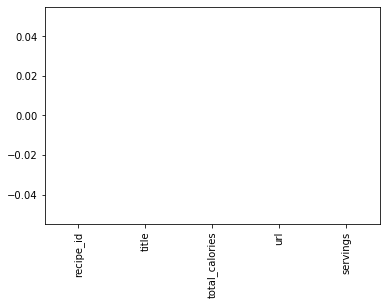

In [5]:
df.isna().mean().plot.bar()

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(594366, 5)

In [8]:
df.describe()

,recipe_id,total_calories,servings
count,5.943660e+05,594366.000000,594366.000000
mean,1.386698e+06,231.076939,8.666781
std,9.175214e+05,141.662089,10.609149
min,5.000000e+00,0.000000,1.000000
25%,5.608360e+05,128.400000,4.000000
50%,1.303338e+06,205.700000,6.000000
75%,2.148266e+06,305.000000,10.000000
max,3.199977e+06,1000.000000,255.000000


### Drop recipes for sauces

In [9]:
sauce_mask = df.title.str.lower().str.contains("sauce")

df[sauce_mask].sample(10)

,recipe_id,title,total_calories,url,servings
171202,649347,Chipotle Southwest Sauce,37.0,https://recipes.sparkpeople.com/recipe-detail....,4.0
193617,745064,Macaroni with meat sauce & hidden veggies,345.4,https://recipes.sparkpeople.com/recipe-detail....,12.0
96836,358819,Dill fish sauce,42.3,https://recipes.sparkpeople.com/recipe-detail....,8.0
76142,282254,Homemade spaghetti sauce,235.3,https://recipes.sparkpeople.com/recipe-detail....,6.0
210299,830404,Chicken Fingers (baked with dipping sauce),641.0,https://recipes.sparkpeople.com/recipe-detail....,4.0
552303,2850860,Balti Chicken in Hara Marsal Sauce,164.9,https://recipes.sparkpeople.com/recipe-detail....,4.0
312894,1388353,Crock Pot Chicken in Peanut Sauce,169.5,https://recipes.sparkpeople.com/recipe-detail....,8.0
572514,3020712,bbq apricot sauce,114.1,https://recipes.sparkpeople.com/recipe-detail....,6.0
523176,2646026,Smoked sausage stir-fry with veal sauce over n...,507.3,https://recipes.sparkpeople.com/recipe-detail....,4.0
446078,2150030,Yogurt-Dill Sauce,16.1,https://recipes.sparkpeople.com/recipe-detail....,4.0


In [10]:
df_no_sauce = df[~sauce_mask]

### Drop recipes with too many / too few servings

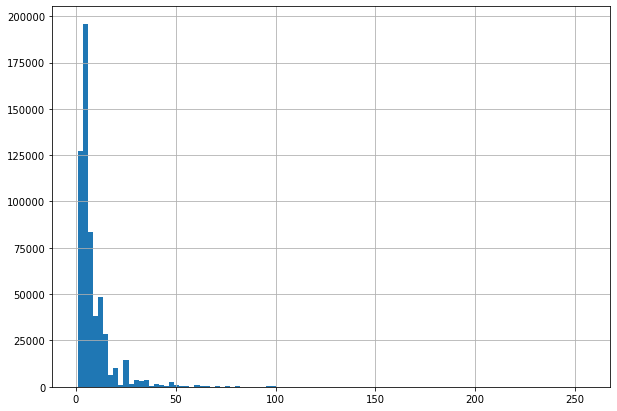

In [11]:
df_no_sauce.servings.hist(bins=100, figsize=(10, 7))

In [12]:
servings_top_quantile = df_no_sauce.servings.quantile(0.95)

f"Top Q: {servings_top_quantile}"

'Top Q: 24.0'

Here we exclude recipes with the number of servings greater than 1.0 because it's likely that the user simply forgot to add this information.

In [13]:
df_filtered_serv = df_no_sauce[(df_no_sauce.servings > 1.0) * (df_no_sauce.servings < servings_top_quantile)]
df_filtered_serv.sample(10)

/home/mike/.conda/envs/seefood/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


,recipe_id,title,total_calories,url,servings
95030,352002,A Lighter Tuna Salad,135.5,https://recipes.sparkpeople.com/recipe-detail....,4.0
260130,1096969,Flax Seed Oatmeal Cookies,239.8,https://recipes.sparkpeople.com/recipe-detail....,15.0
491014,2434664,"Pie Crust-EASY, NO-FAIL",307.0,https://recipes.sparkpeople.com/recipe-detail....,8.0
175273,665814,Crockpot Split Pea Soup With Ham,121.8,https://recipes.sparkpeople.com/recipe-detail....,10.0
178011,676748,Bruchetta Chicken Pasta,318.8,https://recipes.sparkpeople.com/recipe-detail....,5.0
329054,1475660,Awesome Mini Meatloaf,291.1,https://recipes.sparkpeople.com/recipe-detail....,6.0
44430,166413,Spicy Garlic Bread Chicken,344.6,https://recipes.sparkpeople.com/recipe-detail....,5.0
37631,140459,Italian Chicken Cordon Feta,567.3,https://recipes.sparkpeople.com/recipe-detail....,3.0
153364,578785,Chocolate Bar Brownies,255.9,https://recipes.sparkpeople.com/recipe-detail....,12.0
74909,277348,Taco Soup,379.5,https://recipes.sparkpeople.com/recipe-detail....,8.0


In [14]:
df_filtered_serv.shape

(465345, 5)

### Drop Outliers w.r.t. total calories

In [15]:
top_quantile = df_filtered_serv.total_calories.quantile(0.97)
bottom_quantile = df_filtered_serv.total_calories.quantile(0.01)

f"Top Q: {top_quantile}, Bottom Q:  {bottom_quantile}"

'Top Q: 521.8679999999993, Bottom Q:  25.5'

In [16]:
df_filtered = df_filtered_serv[(df_filtered_serv.total_calories > bottom_quantile) * (df_filtered_serv.total_calories < top_quantile)]
df_filtered.shape

(446714, 5)

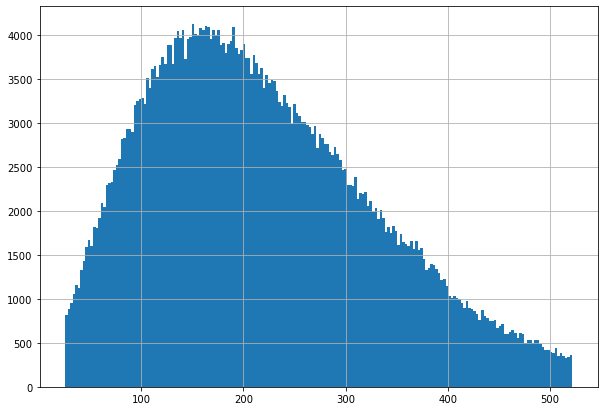

In [17]:
df_filtered.total_calories.hist(bins=200, figsize=(10, 7));

In [18]:
df_filtered.total_calories.describe()

count    446714.000000
mean        219.235311
std         109.400469
min          25.600000
25%         134.200000
50%         204.200000
75%         291.800000
max         521.800000
Name: total_calories, dtype: float64

In [19]:
df_dropouts = df.drop(df_filtered.index)

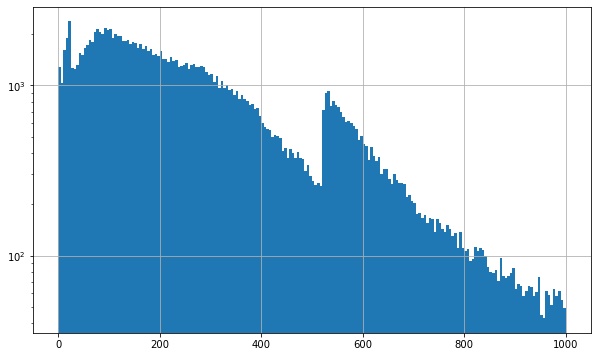

In [20]:
df_dropouts.total_calories.hist(bins=200, log=True, figsize=(10, 6));

In [21]:
with pd.option_context('display.max_rows', 10, 'max_colwidth', -1):
    display(df_dropouts[["title", "total_calories", "url"]].sample(10))

,title,total_calories,url
497833,Cornbread,105.7,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=2478716
235424,grilled cheese with swiss & american,315.9,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=962526
181436,Healthy Banana Split,242.9,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=690689
336629,Low Cal Frozen Frappuccino,44.4,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1521404
377938,Megan's Favorite Salad,247.8,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1760058
398686,Fat Free Turkey Gravy,19.9,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1875181
167765,easy salad,103.3,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=636118
543368,"spaghette pasta with, chicken, and broccoli in a creamy parmesan white sauce 417@2 1/2 cups",416.7,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=2784525
410320,"Wowbutter Cookies (Homemade - no eggs, dairy or nuts)",99.6,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1939550
537442,Good Cheer Coffee,341.0,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=2744863


In [22]:
df_dropouts.total_calories.describe()

count    147652.000000
mean        266.903213
std         207.040637
min           0.000000
25%         105.200000
50%         213.200000
75%         374.100000
max        1000.000000
Name: total_calories, dtype: float64

### Analyze recipes with high / low calories

In [23]:
fil_top_quantile = df_filtered.total_calories.quantile(0.90)
fil_bottom_quantile = df_filtered.total_calories.quantile(0.1)

In [24]:
df_high_cal = df_filtered[df_filtered.total_calories > fil_top_quantile]
df_low_cal = df_filtered[df_filtered.total_calories < fil_bottom_quantile]

In [25]:
df_high_cal.shape

(44668, 5)

In [26]:
df_low_cal.shape

(44546, 5)

In [27]:
with pd.option_context('max_colwidth', -1):
    display(df_high_cal.sample(10))

,recipe_id,title,total_calories,url,servings
366390,1694912,BBQ Chicken Enchiladas,444.5,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1694912,8.0
587256,3142523,Tuscany chicken with spaghetti,509.5,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=3142523,8.0
365711,1690886,Chicken / Peppers over Brown Rice,387.0,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1690886,4.0
298000,1308091,Turkey Kilbasa and Pasta,393.8,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1308091,4.0
341553,1551042,Sausage Grinders,442.6,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1551042,6.0
180637,687463,Meatloaf-- healthy cooking magazine,463.3,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=687463,4.0
285255,1235775,Mexican Lasagna,456.5,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1235775,6.0
94478,349933,Green Chili Cheese Chicken Pasta,413.2,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=349933,5.0
44060,165013,Pork Chop Bake,381.0,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=165013,6.0
172387,654084,Black Bean & Rice Enchiladas,500.2,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=654084,6.0


In [28]:
with pd.option_context('max_colwidth', -1):
    display(df_low_cal.sample(10))

,recipe_id,title,total_calories,url,servings
97042,359552,Sara's Spanish Style Rice,81.8,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=359552,6.0
280574,1209680,Black Bean Salsa,85.3,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1209680,18.0
447085,2156173,Asian Dressing,61.3,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=2156173,2.0
409221,1933695,Mom's Miracle salad dressing,51.5,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1933695,8.0
231114,939177,Minestrone,37.7,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=939177,16.0
454612,2200571,Sourdough English muffins,60.8,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=2200571,18.0
580864,3091381,Protein balls,29.0,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=3091381,20.0
298806,1312762,Cabbage soup - 2 bowls,45.2,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=1312762,10.0
45033,168458,Punjabi Beans,60.1,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=168458,12.0
50549,187926,gelatin salad,84.0,https://recipes.sparkpeople.com/recipe-detail.asp?recipe=187926,5.0


In [29]:
high_cal_wc = WordCloud().generate(" ".join(df_high_cal.title.str.lower()))
low_cal_wc = WordCloud().generate(" ".join(df_low_cal.title.str.lower()))

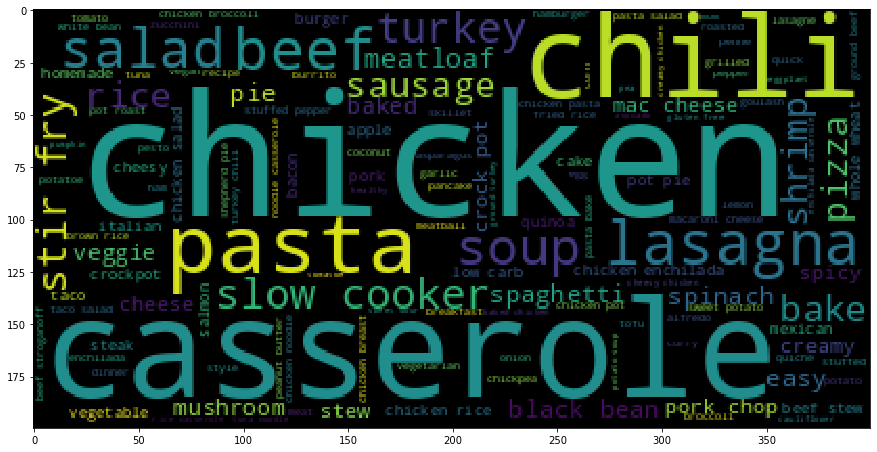

In [30]:
plt.figure(figsize = (15,15))
plt.imshow(high_cal_wc, interpolation='nearest')

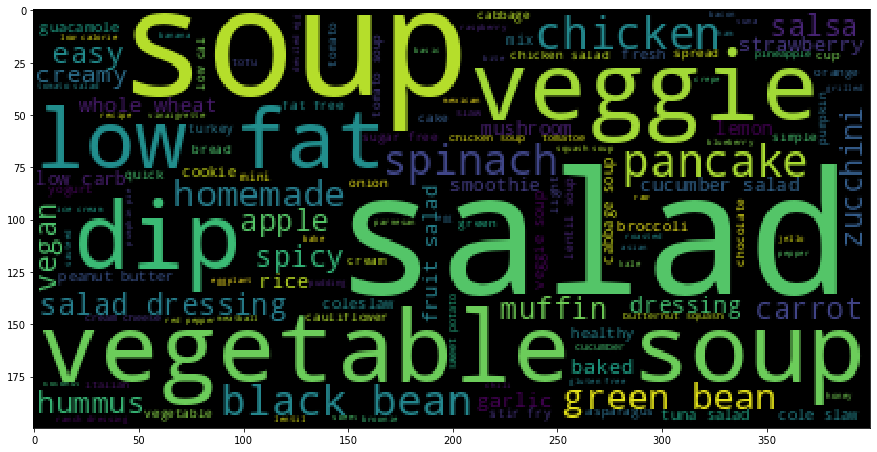

In [31]:
plt.figure(figsize = (15,15))
plt.imshow(low_cal_wc, interpolation='nearest')

### Persist dataframes for further analysis

In [32]:
df_filtered.to_csv("../../data/sparkrecipes_filtered.csv", index=False)